In [53]:
import pandas as pd

df = pd.read_csv('./data/SanDiegoWeather.csv')

# remove duplicate timepoints
df.drop_duplicates('dt', inplace=True)

# data from 2016-10 and beyond; selected columns only
df = df.loc[ df['dt'] >= 1475280000, ['dt','dt_iso','rain_1h', 'rain_3h'] ]
df.fillna(0,inplace=True)

# it appears that rain_3h values should actually be placed in column rain_1h 
# get max between 'rain_1h', 'rain_3h'
df['rain_1h'] = df[['rain_1h','rain_3h']].max(axis=1)

del df['rain_3h']

df.head()


,dt,dt_iso,rain_1h
25103,1475280000,2016-10-01 00:00:00 +0000 UTC,0.0
25104,1475283600,2016-10-01 01:00:00 +0000 UTC,0.0
25105,1475287200,2016-10-01 02:00:00 +0000 UTC,0.0
25106,1475290800,2016-10-01 03:00:00 +0000 UTC,0.0
25107,1475294400,2016-10-01 04:00:00 +0000 UTC,0.0


In [54]:
# get total rain data per month

# get substring YYYY-MM
df['Month'] = [ s[0:7] for s in df['dt_iso'] ]

# get total rain by Month
gb = df.groupby('Month')['rain_1h'].sum()

df2 = pd.DataFrame(gb)
df2.rename(columns={'rain_1h':'Total Rain (mm)'}, inplace=True)
df2


,Total Rain (mm)
Month,
2016-10,17.002500
2016-11,0.945000
2016-12,0.290000
2017-01,7.420000
2017-02,138.844999
2017-03,0.000000
2017-04,0.000000
2017-05,0.000000
2017-06,0.000000


In [55]:
# get total number of pothole repair requests per month
pothole_df = pd.read_csv("data/20190228_get_it_done_pothole_requests_datasd.csv")

# get substring YYYY-MM
pothole_df['Month'] = [ s[0:7] for s in pothole_df['requested_datetime'] ]
pothole_reports = pd.DataFrame(pothole_df.groupby('Month')['Month'].count())
pothole_reports.rename(columns={'Month':'Service Requests'}, inplace=True)
pothole_reports = pothole_reports.loc['2016-10':'2019-02']
pothole_reports

,Service Requests
Month,
2016-10,524
2016-11,583
2016-12,1111
2017-01,6711
2017-02,3338
2017-03,3954
2017-04,2436
2017-05,1895
2017-06,1283


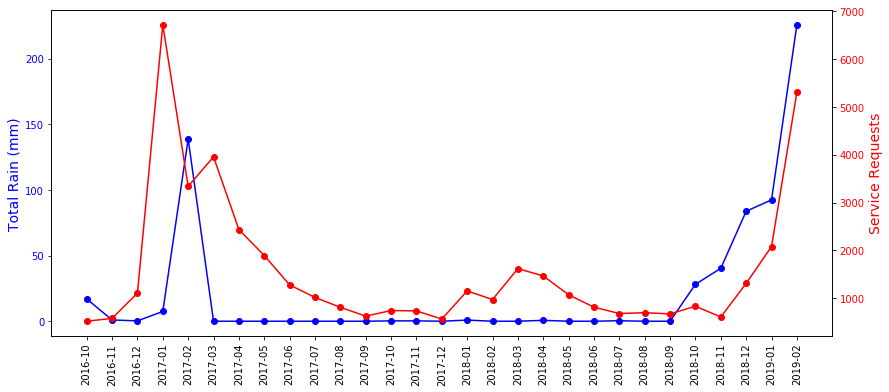

In [56]:
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots(figsize=(14,6))

x1 = list(range(len(df2)))
y1 = df2['Total Rain (mm)']

x2 = list(range(len(pothole_reports)))
y2 = pothole_reports['Service Requests']

ax1.set_ylabel('Total Rain (mm)', color='blue', fontsize=14)
ax1.plot(x1,y1,marker='o', color='blue')
#ax1.set_xticklabels(df2.index, rotation='vertical')
plt.xticks(x1,df2.index,rotation='vertical')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()

ax2.set_ylabel('Service Requests', color='red', fontsize=14)
ax2.plot(x2,y2,marker='o', color='red')
ax2.tick_params(axis='y', labelcolor='red')




In [18]:

x = list(range(len(pothole_reports)))
y = pothole_reports['Service Requests']
plt.plot(x,y,marker='o')
plt.ylabel('Service Requests')
labels = plt.xticks(x,pothole_reports.index, rotation='vertical')

,service_request_id,requested_datetime,case_age_days,service_name,case_record_type,updated_datetime,status,lat,long,district,case_origin,referred_department,public_description,Month
0,80508,2016-05-20T08:55:00,0.0,Pothole,TSW,2016-05-20T16:42:00,Closed,32.831881,-117.231233,2.0,Phone,NaN,"test only, please dont create a notification",2016-05
1,80510,2016-05-20T09:05:00,0.0,Pothole,TSW,2016-05-20T16:42:00,Closed,32.716021,-117.159052,3.0,Web,NaN,Test Only - Please close,2016-05
2,80518,2016-05-20T09:31:00,19.0,Pothole,TSW,2016-06-07T21:39:00,Closed,32.760286,-117.104798,9.0,Phone,NaN,4000 block of copeland just before you get on ...,2016-05
3,80531,2016-05-20T10:43:00,5.0,Pothole,TSW,2016-05-25T22:37:00,Closed,32.955916,-117.252152,1.0,Phone,NaN,LARGE P/H CAUSED VEHICLE DAMAGE,2016-05
4,80535,2016-05-20T11:14:00,0.0,Pothole,TSW,2016-05-20T13:36:00,Closed,32.710295,-117.155278,3.0,Web,NaN,This is a test. Please close when you receive.,2016-05
